In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/dataset/titanic.csv'
data = pd.read_csv(file_path)


In [34]:
data.Age = data.Age.fillna(data.Age.median())
features = ['SibSp','Parch','Age','Pclass','Ticket','Embarked','Fare','Sex']
x = data[features]
y = data['Survived']

In [32]:
encod = LabelEncoder()
data['Ticket'] = encod.fit_transform(data['Ticket'])
data['Embarked']= encod.fit_transform(data['Embarked'])
data['Fare']= encod.fit_transform(data['Fare'])
data['Sex']= encod.fit_transform(data['Sex'])



In [35]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

gnb = GaussianNB()

gnb.fit(train_x, train_y)

prediction = gnb.predict(test_x)

In [36]:
accuracy = accuracy_score(test_y, prediction)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(test_y, prediction)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.00
Confusion Matrix:
[[55  0]
 [ 0 29]]


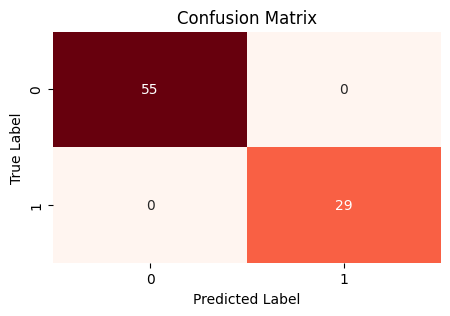

In [37]:

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()